# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
dice = [1, 2, 3, 4, 5, 6]
def rolling_data(dice):
    roll_dice = random.choices(dice, k=10)
    return roll_dice

In [3]:
numbers = rolling_data(dice) 

dice=pd.DataFrame(numbers,columns=["Value"])

In [4]:
dice

,Value
0,4
1,2
2,5
3,1
4,6
5,4
6,5
7,6
8,1
9,5


#### 2.- Plot the results sorted by value.

In [5]:
# your code here
dice.sort_values(by=['Value'])

,Value
3,1
8,1
1,2
0,4
5,4
2,5
6,5
9,5
4,6
7,6


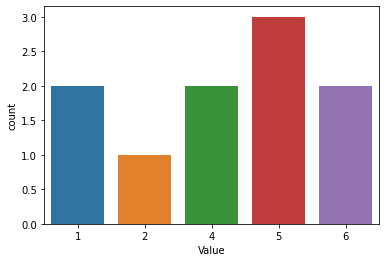

In [6]:
import seaborn as sns
sns.countplot(x="Value", data=dice)
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

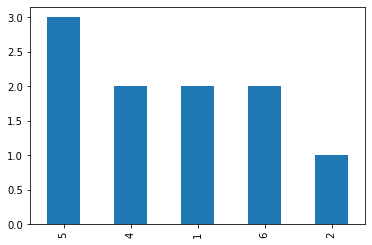

In [7]:
# your code here

dice['Value'].value_counts().plot(kind='bar')
plt.show()


In [8]:
"""
your comments here

It shows the frequency of each number
"""

'\nyour comments here\n\nIt shows the frequency of each number\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
# your code here
def give_mean(l):
    return sum(l)/len(l)

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [10]:
# your code here
give_mean(dice['Value'])

3.9

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [11]:
# your code here

def give_median(l):
    return np.median(l)

In [12]:
give_median(dice['Value'])

4.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [13]:
# your code here

def give_quartile(l):
    return l.quantile()

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [14]:
# your code here
data=pd.read_csv("roll_the_dice_hundred.csv")
data.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


In [15]:
data.sort_values(by=['value'])

,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1
...,...,...,...
17,17,17,6
11,11,11,6
24,24,24,6
21,21,21,6


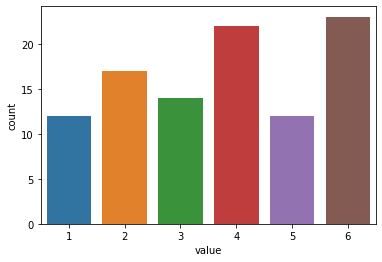

In [16]:
sns.countplot(x="value", data=data)
plt.show()

In [17]:
"""
your comments here

I see the frequency of each number
"""

'\nyour comments here\n\nI see the frequency of each number\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [18]:
# your code here
give_mean(data['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [19]:
# your code here
dice_frequency = data.groupby('value').agg({"value":"count"})
dice_frequency

,value
value,
1,12
2,17
3,14
4,22
5,12
6,23


In [20]:
dice_frequency['frequency'] = dice_frequency['value']/ 100
dice_frequency

,value,frequency
value,,
1,12,0.12
2,17,0.17
3,14,0.14
4,22,0.22
5,12,0.12
6,23,0.23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

In [21]:
# your code here
dice_frequency = dice_frequency.rename(columns={"value": "count_value"})


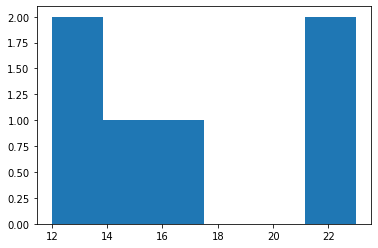

In [22]:
dice_frequency['count_value'].hist(bins=6, grid= False)
plt.show()

In [23]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [24]:
# your code here
roll_the_dice_thousand = pd.read_csv("roll_the_dice_thousand.csv")
roll_the_dice_thousand

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
...,...,...,...
995,995,995,1
996,996,996,4
997,997,997,4
998,998,998,3


In [25]:
dice_freq = roll_the_dice_thousand.groupby('value').agg({'value':'count'})
dice_freq['frequency'] = dice_freq['value'] /1000
dice_freq

,value,frequency
value,,
1,175,0.175
2,167,0.167
3,175,0.175
4,168,0.168
5,149,0.149
6,166,0.166


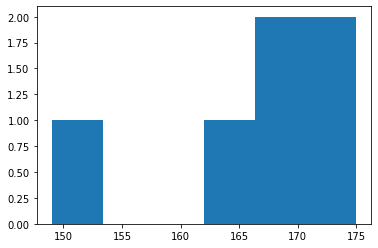

In [26]:
dice_freq['value'].hist(bins=6, grid= False)
plt.show()

In [27]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [28]:
# your code here
data_age = pd.read_csv('ages_population.csv')
data_age

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


In [29]:
data_age=data_age.groupby("observation").agg({'observation':'count'})
data_age

,observation
observation,
1.0,2
2.0,2
4.0,1
5.0,2
6.0,2
...,...
69.0,1
70.0,1
71.0,1


In [30]:
data_age['frequency'] = data_age['observation'] /1000
data_age

,observation,frequency
observation,,
1.0,2,0.002
2.0,2,0.002
4.0,1,0.001
5.0,2,0.002
6.0,2,0.002
...,...,...
69.0,1,0.001
70.0,1,0.001
71.0,1,0.001


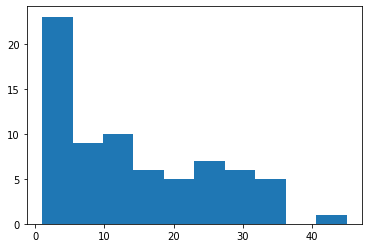

In [31]:
data_age['observation'].hist(grid= False)
plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [32]:
# your code here
print(data_age['observation'].mean())
print(data_age['observation'].std())

13.88888888888889
11.261995864886465


In [33]:
"""
your comments here
"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [34]:
# your code here
data_age_2=pd.read_csv("ages_population2.csv")
data_age_2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


In [35]:
data_age_2['frequency'] = data_age_2['observation'] /1000
data_age_2

,observation,frequency
0,25.0,0.025
1,31.0,0.031
2,29.0,0.029
3,31.0,0.031
4,29.0,0.029
...,...,...
995,26.0,0.026
996,22.0,0.022
997,21.0,0.021
998,19.0,0.019


In [36]:
data_age_2=data_age_2.groupby("observation").agg({"observation":"count"})
data_age_2

,observation
observation,
19.0,3
20.0,13
21.0,17
22.0,35
23.0,41
24.0,78
25.0,98
26.0,120
27.0,125


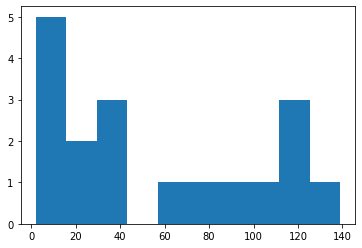

In [37]:
data_age_2['observation'].hist(grid= False)
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [38]:
"""
your comments here

The new one is less distributed
"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [50]:
# your code here

print(data_age_2['observation'].mean())
print(data_age_2['observation'].std())

55.55555555555556
48.14466218317485


In [40]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [57]:
# your code here

data_age_3=pd.read_csv("ages_population3.csv")
data_age_3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


In [58]:
data_age_3['frequency'] = data_age_3['observation'] /1000
data_age_3

,observation,frequency
0,21.0,0.021
1,21.0,0.021
2,24.0,0.024
3,31.0,0.031
4,54.0,0.054
...,...,...
995,16.0,0.016
996,55.0,0.055
997,30.0,0.030
998,35.0,0.035


In [59]:
data_age_3=data_age_3.groupby("observation").agg({"observation":"count"})
data_age_3

,observation
observation,
1.0,1
2.0,2
4.0,2
5.0,1
7.0,1
...,...
73.0,6
74.0,6
75.0,2


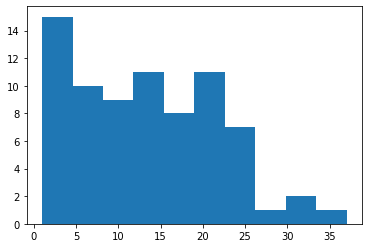

In [60]:
data_age_3['observation'].hist(grid= False)
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [61]:
# your code here
print(data_age_3['observation'].mean())
print(data_age_3['observation'].std())

13.333333333333334
8.726061204469296


In [43]:
"""
your comments here

Smaller mean and std
"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [65]:
# your code here

print(data_age_3.quantile(0.25))
print(data_age_3.quantile(0.50))
print(data_age_3.quantile(0.75))


observation    6.0
Name: 0.25, dtype: float64
observation    13.0
Name: 0.5, dtype: float64
observation    19.0
Name: 0.75, dtype: float64


In [45]:
"""
your comments here
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [66]:
# your code here

give_quartile(data_age_3['observation'])

13.0

In [47]:
"""
your comments here
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [48]:
# your code here

In [49]:
"""
your comments here
"""

'\nyour comments here\n'